In [2]:
# Para no tener que reiniciar el kernel
%load_ext autoreload
%autoreload 2

# Importaciones
import pandas as pd
import numpy as np

#Seteo de opciones
pd.set_option("display.max_columns", None)

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

### Hacemos la descarga de datos de los dos archivos (bank y customer)

In [15]:
df_customer = pd.read_excel("../data/data_raw/customer-details.xlsx", index_col=0)
df_customer.head(10)

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097
2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e
4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb
5,143854,0,1,2012-01-24,26,d63ede72-0b6d-45b1-8872-385ac6897f65
6,76439,1,0,2012-08-15,3,5e3483e5-236d-437d-8351-541f9d09b9dd
7,159686,1,1,2012-12-10,21,87fdc08b-30ae-4dab-803f-561ecdf27ff0
8,179933,0,0,2012-08-22,18,87b79988-2be5-419d-88f4-56655852c565
9,77504,1,0,2012-02-09,18,ea6b7d04-9271-4c0a-a01f-07795d164aba


In [10]:
df_bank = pd.read_csv("../data/data_raw/bank-additional.csv", index_col=0)
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


### Verificamos el tamaño de ambos df

In [13]:
print(f"El tamaño del dataset clientes es de {df_customer.shape[0]} filas y {df_customer.shape[1]} filas")

El tamaño del dataset clientes es de 20115 filas y 6 filas


In [14]:
print(f"El tamaño del dataset clientes es de {df_bank.shape[0]} filas y {df_bank.shape[1]} filas")

El tamaño del dataset clientes es de 43000 filas y 23 filas


### Estandarizamos los nombres de columnas

In [17]:
df_customer.columns = df_customer.columns.str.lower()
df_customer.columns

Index(['income', 'kidhome', 'teenhome', 'dt_customer', 'numwebvisitsmonth',
       'id'],
      dtype='object')

In [25]:
df_bank.columns = df_bank.columns.str.replace("_","").str.lower().str.replace(".","_")
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'empvarrate', 'conspriceidx', 'consconfidx', 'euribor3m', 'nremployed',
       'y', 'date', 'latitude', 'longitude', 'id'],
      dtype='object')

## Análisis inicial df_customer

In [26]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20115 entries, 0 to 20114
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   income             20115 non-null  int64         
 1   kidhome            20115 non-null  int64         
 2   teenhome           20115 non-null  int64         
 3   dt_customer        20115 non-null  datetime64[ns]
 4   numwebvisitsmonth  20115 non-null  int64         
 5   id                 20115 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 1.1+ MB


In [27]:
df_customer.describe().T

,count,mean,min,25%,50%,75%,max,std
income,20115.0,93087.213224,5852.0,49110.0,92962.0,136705.0,180791.0,50614.798255
kidhome,20115.0,1.004176,0.0,0.0,1.0,2.0,2.0,0.816811
teenhome,20115.0,0.999503,0.0,0.0,1.0,2.0,2.0,0.815298
dt_customer,20115,2012-07-01 17:15:14.362416128,2012-01-01 00:00:00,2012-04-01 00:00:00,2012-07-02 00:00:00,2012-09-30 00:00:00,2012-12-31 00:00:00,NaN
numwebvisitsmonth,20115.0,16.54079,1.0,9.0,16.0,25.0,32.0,9.235324


In [30]:
df_customer.describe(include='O')

,id
count,20115
unique,20115
top,089b39d8-e4d0-461b-87d4-814d71e0e079
freq,1


In [32]:
df_customer["dt_customer"] = pd.to_datetime(df_customer["dt_customer"],format = "%m/%d/%Y" )   
df_customer.head()

,income,kidhome,teenhome,dt_customer,numwebvisitsmonth,id
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097
2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e
4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


### Comprobamos si existen outliers en income y numwebvisitsmonth

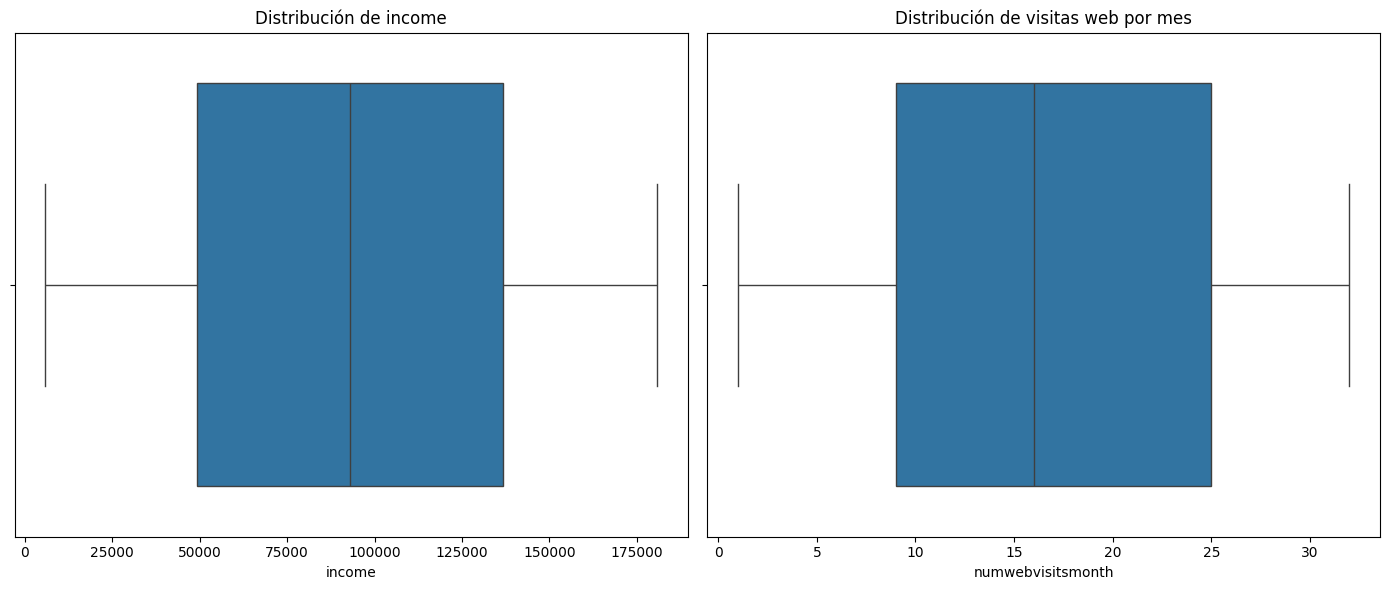

In [35]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df_customer['income'])
plt.title('Distribución de income')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_customer['numwebvisitsmonth'])
plt.title('Distribución de visitas web por mes')

plt.tight_layout()
plt.show()

### Comprobamos presencia de nulos

In [36]:
def null_values(dataframe):
     count_null = dataframe.isnull().sum()
     percen_null = (count_null / dataframe.shape[0])
     df_null = pd.DataFrame({
          "Null Values": count_null,
          "Null percen": percen_null  
     })
     return df_null

In [37]:
null_values(df_customer)

,Null Values,Null percen
income,0,0.0
kidhome,0,0.0
teenhome,0,0.0
dt_customer,0,0.0
numwebvisitsmonth,0,0.0
id,0,0.0


### Comprobamos duplicados en el df y en la columna id

In [40]:
df_customer.duplicated().sum()

np.int64(0)

In [56]:
df_customer.duplicated(["id"]).sum()



np.int64(0)

In [62]:
df_customer.columns

Index(['income', 'kidhome', 'teenhome', 'dt_customer', 'numwebvisitsmonth',
       'id'],
      dtype='object')

In [69]:
df_customer["id"].unique()

array(['089b39d8-e4d0-461b-87d4-814d71e0e079',
       'e9d37224-cb6f-4942-98d7-46672963d097',
       '3f9f49b5-e410-4948-bf6e-f9244f04918b', ...,
       '3769cb72-26be-40f2-9a93-f752fc96d628',
       'd507f6b3-a030-46d7-9615-61fe3f6b8028',
       '8299f0a6-e4c0-49fc-87ab-81308b70f80f'],
      shape=(20115,), dtype=object)

## Preanálisis df_bank

### info()

In [73]:
df_bank.sample(10)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y,date,latitude,longitude,id
40818,23.0,student,SINGLE,university.degree,0.0,1.0,0.0,cellular,349,2,999,4,FAILURE,-1.1,"94,199","-37,5","0,879","4963,6",no,11-diciembre-2018,48.319,-106.555,33ded081-8ed0-42e1-b1cb-a75a72cc3c4b
32701,39.0,services,MARRIED,high.school,0.0,1.0,0.0,cellular,49,1,999,1,FAILURE,-1.8,"92,893","-46,2","1,299","5099,1",no,11-enero-2016,26.366,-113.945,92a6e322-8056-4f34-9cd7-3437307c3b1c
19004,53.0,blue-collar,MARRIED,basic.4y,0.0,0.0,0.0,cellular,76,1,999,0,NONEXISTENT,1.4,"93,444","-36,1","4,968","5228,1",no,12-febrero-2019,37.726,-94.232,2105535d-4d3e-4cc3-90f5-b7f4a8f6c4f1
39584,NaN,student,SINGLE,high.school,0.0,0.0,0.0,cellular,104,1,7,1,SUCCESS,-1.8,"93,876",-40,NaN,"5008,7",no,16-noviembre-2015,24.928,-122.041,2bc0ba53-48f3-4f2a-bc66-717fde0503c3
220,35.0,admin.,MARRIED,high.school,0.0,1.0,0.0,telephone,216,2,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,13-noviembre-2017,44.843,-102.216,f6455423-ddf1-472c-9a13-1b3c75954d7d
7112,44.0,blue-collar,MARRIED,basic.9y,0.0,1.0,0.0,telephone,480,2,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,86",5191,no,30-septiembre-2017,34.418,-86.171,53aae634-49f2-4466-bd1f-e4d369991405
39226,34.0,admin.,SINGLE,university.degree,0.0,0.0,1.0,cellular,288,2,3,1,SUCCESS,-1.8,"93,369","-34,8","0,652","5008,7",yes,8-diciembre-2016,45.938,-72.079,731a9d12-9958-4a60-bdba-9572c8a5a602
31264,42.0,blue-collar,MARRIED,basic.6y,NaN,0.0,1.0,cellular,29,1,999,1,FAILURE,-1.8,"92,893","-46,2","1,334","5099,1",no,3-febrero-2018,30.526,-118.995,7e065abb-2e7b-4ba1-ae49-2f2f9118ddc4
27393,NaN,entrepreneur,MARRIED,university.degree,0.0,0.0,0.0,cellular,48,1,999,1,FAILURE,-0.1,"93,2",-42,NaN,"5195,8",no,30-septiembre-2016,30.980,-79.244,9cba2b92-5381-4d3a-8148-d1ced21f6132
36868,NaN,unemployed,SINGLE,basic.4y,0.0,0.0,0.0,cellular,276,2,999,0,NONEXISTENT,-2.9,"92,963","-40,8","1,252","5076,2",no,4-febrero-2016,28.528,-75.576,d9fbe96c-9548-48d9-a9e4-85c493c012ab


In [70]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43000 entries, 0 to 27570
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           37880 non-null  float64
 1   job           42655 non-null  object 
 2   marital       42915 non-null  object 
 3   education     41193 non-null  object 
 4   default       34019 non-null  float64
 5   housing       41974 non-null  float64
 6   loan          41974 non-null  float64
 7   contact       43000 non-null  object 
 8   duration      43000 non-null  int64  
 9   campaign      43000 non-null  int64  
 10  pdays         43000 non-null  int64  
 11  previous      43000 non-null  int64  
 12  poutcome      43000 non-null  object 
 13  empvarrate    43000 non-null  float64
 14  conspriceidx  42529 non-null  object 
 15  consconfidx   43000 non-null  object 
 16  euribor3m     33744 non-null  object 
 17  nremployed    43000 non-null  object 
 18  y             43000 non-null  o